# Neural network for weather prediction (drizzle/fog/rain/snow/sun) per variable container (rainfall/maximum temperature/minimum temperature/wind).

## Based on data for the city of Seattle (USA) collected in 2012-2015.

## Data visualization

### Initial data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data frame from file
df = pd.read_csv('seattle-weather.csv')
# view the first 5 rows in the data frame
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [4]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

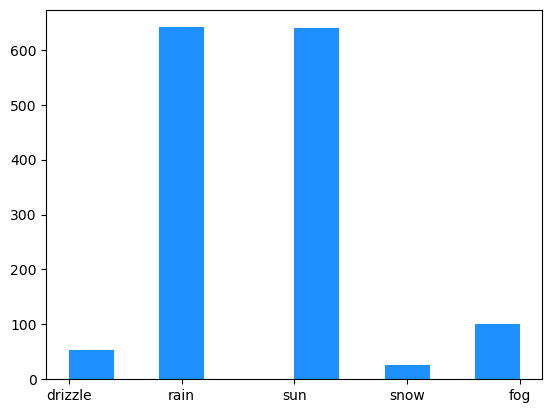

In [8]:
plt.hist(df['weather'], color='dodgerblue')
plt.show()

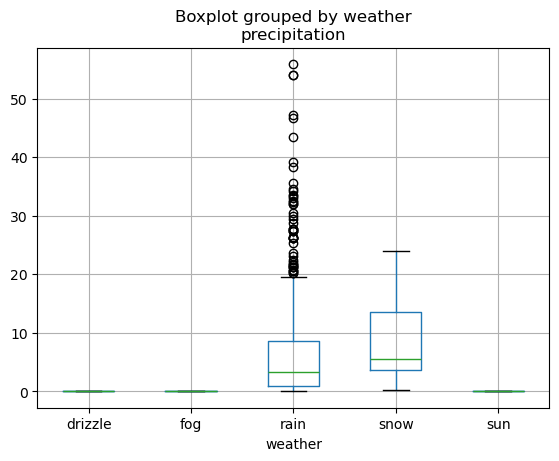

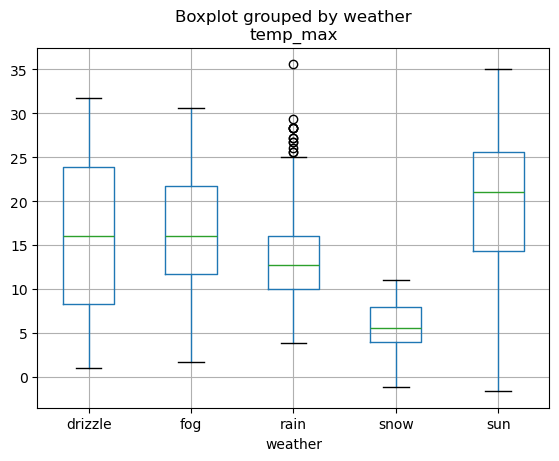

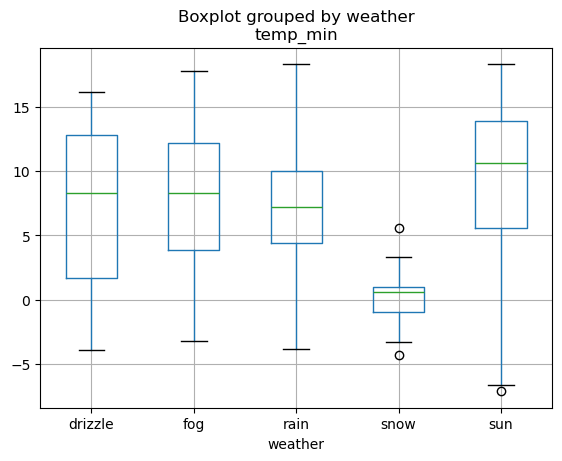

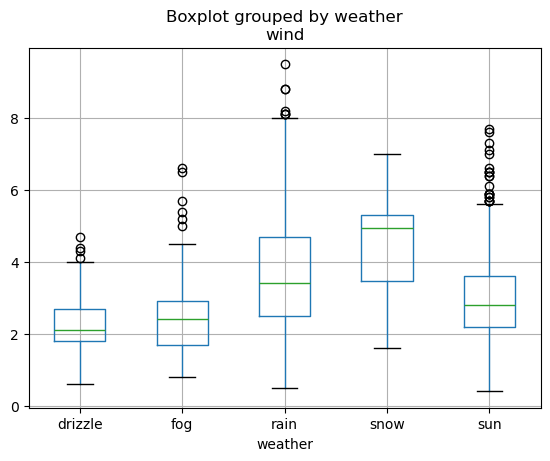

In [9]:
for i in df.columns.drop(['date', 'weather']):
    df.boxplot(by='weather', column=i)

In [10]:
df.corr(numeric_only = True).style.background_gradient('Wistia')

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [11]:
weather_unique_lbs = np.unique(df['weather'].values)
weather_unique_lbs

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [12]:
idx_lst = []
for i in weather_unique_lbs:
    idx = df[df['weather'] == i]['weather'].index[0]
    idx_lst.append(idx)
# list containing the first occurrence of each weather type in the table
idx_lst

[0, 192, 1, 13, 7]

In [13]:
start_y = int(df['date'].dropna().min()[:4])
end_y = int(df['date'].dropna().max()[:4])
# years of our data coverage
start_y, end_y

(2012, 2015)

### Extract average data for each year
#### Objects (dictionaries) weather0 - weather4 are created that correspond to each type of weather.
#### These objects have a key as a year and a value as a list consisting of averaged values ​​for: precipitation, maximum temperature, minimum temperature and wind

In [14]:
# weather_0 = {2012: [p, tmax, tmin, wind]}
weather_0 = {k: [] for k in range(start_y, end_y+1)}
weather_1 = {k: [] for k in range(start_y, end_y+1)}
weather_2 = {k: [] for k in range(start_y, end_y+1)}
weather_3 = {k: [] for k in range(start_y, end_y+1)}
weather_4 = {k: [] for k in range(start_y, end_y+1)}
for y in range(start_y, end_y+1):
    for i, w in {'drizzle': weather_0, 'fog': weather_1, 'rain': weather_2, 'snow': weather_3, 'sun': weather_4}.items():
        if len(df[(df['weather'] == i) & (df['date'].str.startswith(str(y)))]):
            m = df[(df['weather'] == i) & (df['date'].str.startswith(str(y)))].mean(numeric_only=True)
            w[y].append(m['precipitation'])
            w[y].append(m['temp_max'])
            w[y].append(m['temp_min'])
            w[y].append(m['wind'])
print(weather_0)
print(weather_1)
print(weather_2)
print(weather_3)
print(weather_4)

{2012: [0.0, 17.374193548387094, 8.667741935483871, 2.512903225806452], 2013: [0.0, 7.4399999999999995, 0.66, 2.0000000000000004], 2014: [], 2015: [0.0, 27.700000000000006, 14.042857142857144, 2.5142857142857147]}
{2012: [0.0, 21.1, 9.34, 2.4200000000000004], 2013: [0.0, 19.387500000000003, 9.89375, 2.1125], 2014: [0.0, 17.84642857142857, 8.678571428571429, 2.7678571428571432], 2015: [0.0, 14.944230769230769, 6.882692307692308, 2.446153846153846]}
{2012: [5.37329842931937, 12.807329842931937, 6.76439790575916, 3.625130890052356], 2013: [5.151898734177215, 13.625316455696204, 7.907594936708861, 3.573417721518987], 2014: [8.270945945945945, 14.207432432432434, 8.287162162162161, 3.8837837837837834], 2015: [7.91111111111111, 13.352083333333333, 7.614583333333333, 3.615277777777778]}
{2012: [9.50952380952381, 5.395238095238096, 0.3047619047619048, 4.480952380952381], 2013: [4.666666666666667, 7.2, 0.7333333333333334, 3.5666666666666664], 2014: [4.35, 5.0, -2.4, 4.949999999999999], 2015: []

#### Function that replaces the value of an empty list (in the above objects) with the value None (making it easier to create a chart)

In [15]:
def replace_with_none(dct):
    for k, v in dct.items():
        if not v:
            dct[k] = None
    return dct

#### Calling functions on objects

In [16]:
weather_0 = replace_with_none(weather_0)
weather_1 = replace_with_none(weather_1)
weather_2 = replace_with_none(weather_2)
weather_3 = replace_with_none(weather_3)
weather_4 = replace_with_none(weather_4)

#### Preview of object values

In [17]:
print(weather_0)
print(weather_1)
print(weather_2)
print(weather_3)
print(weather_4)

{2012: [0.0, 17.374193548387094, 8.667741935483871, 2.512903225806452], 2013: [0.0, 7.4399999999999995, 0.66, 2.0000000000000004], 2014: None, 2015: [0.0, 27.700000000000006, 14.042857142857144, 2.5142857142857147]}
{2012: [0.0, 21.1, 9.34, 2.4200000000000004], 2013: [0.0, 19.387500000000003, 9.89375, 2.1125], 2014: [0.0, 17.84642857142857, 8.678571428571429, 2.7678571428571432], 2015: [0.0, 14.944230769230769, 6.882692307692308, 2.446153846153846]}
{2012: [5.37329842931937, 12.807329842931937, 6.76439790575916, 3.625130890052356], 2013: [5.151898734177215, 13.625316455696204, 7.907594936708861, 3.573417721518987], 2014: [8.270945945945945, 14.207432432432434, 8.287162162162161, 3.8837837837837834], 2015: [7.91111111111111, 13.352083333333333, 7.614583333333333, 3.615277777777778]}
{2012: [9.50952380952381, 5.395238095238096, 0.3047619047619048, 4.480952380952381], 2013: [4.666666666666667, 7.2, 0.7333333333333334, 3.5666666666666664], 2014: [4.35, 5.0, -2.4, 4.949999999999999], 2015: 

### Function that gets rid of a key from an object (dictionary) where the value is set to None

In [18]:
def get_val(dct, idx):
    res = {k: None for k in range(start_y, end_y+1)}
    for y in range(start_y, end_y+1):
        if dct[y] is not None:
            res[y] = dct[y][idx]
        else:
            del res[y]
    return res

### Function for data visualization

In [19]:
def plot_data(ylab, idx, weather_0, weather_1, weather_2,
              weather_3, weather_4):
    w_0 = get_val(weather_0, idx)
    w_1 = get_val(weather_1, idx)
    w_2 = get_val(weather_2, idx)
    w_3 = get_val(weather_3, idx)
    w_4 = get_val(weather_4, idx)

    figure, axes = plt.subplots(5, 1, figsize=(10, 7))
    figure.tight_layout()
    for ax in axes.flat:
        ax.set_xlabel('Year')
        ax.set_ylabel(ylab)

    colors = ['deepskyblue', 'orange', 'purple', 'olive', 'green']
    
    for i in range(5):
        var = locals()[f'w_{i}']
        axes[i].plot([k for k in var.keys()], [k for k in var.values()], 
                     label=weather_unique_lbs[i], c=colors[i], marker='o')
        axes[i].legend()
        axes[i].grid(axis='y')
    
    plt.legend()
    plt.show()

### Visualization of averaged data

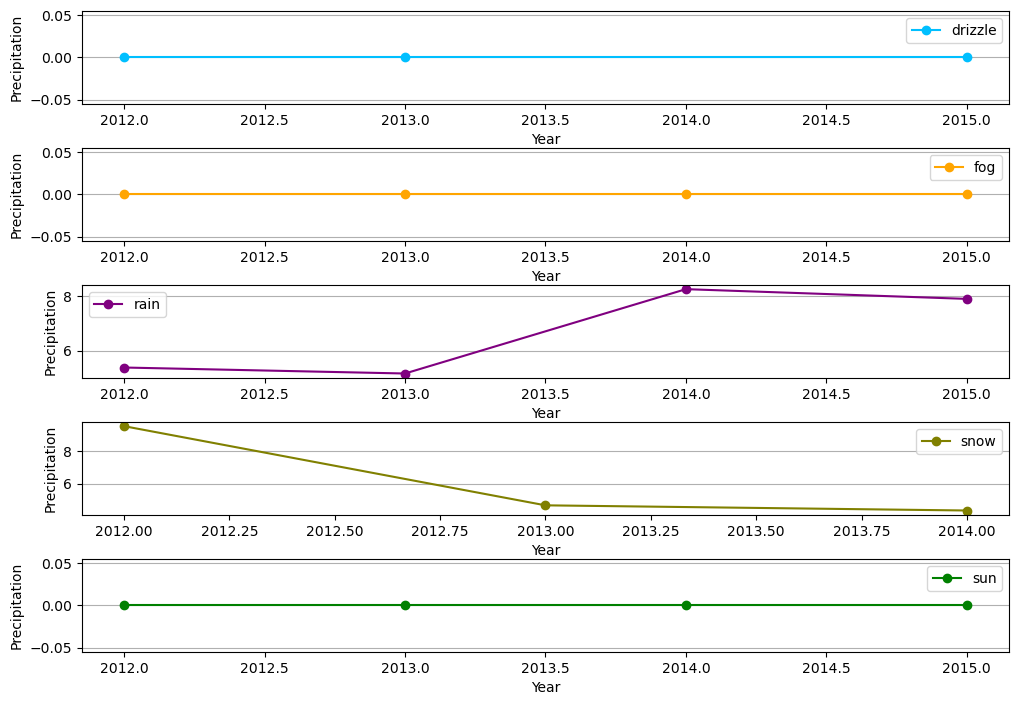

In [20]:
plot_data('Precipitation', 0, weather_0, weather_1, weather_2, weather_3, weather_4)

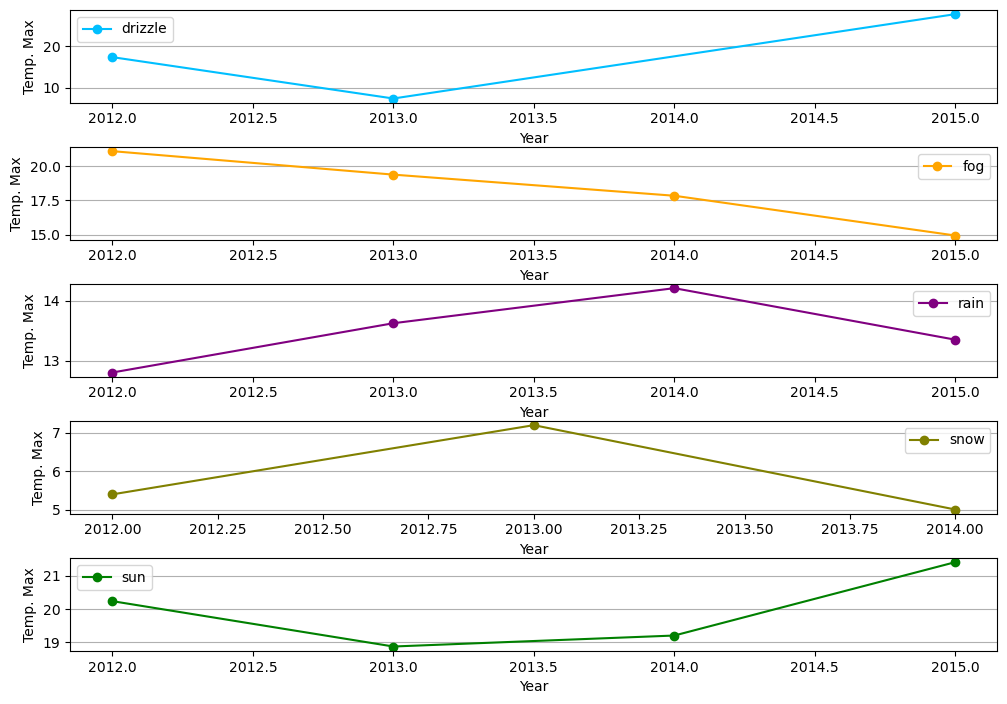

In [21]:
plot_data('Temp. Max', 1, weather_0, weather_1, weather_2, weather_3, weather_4)

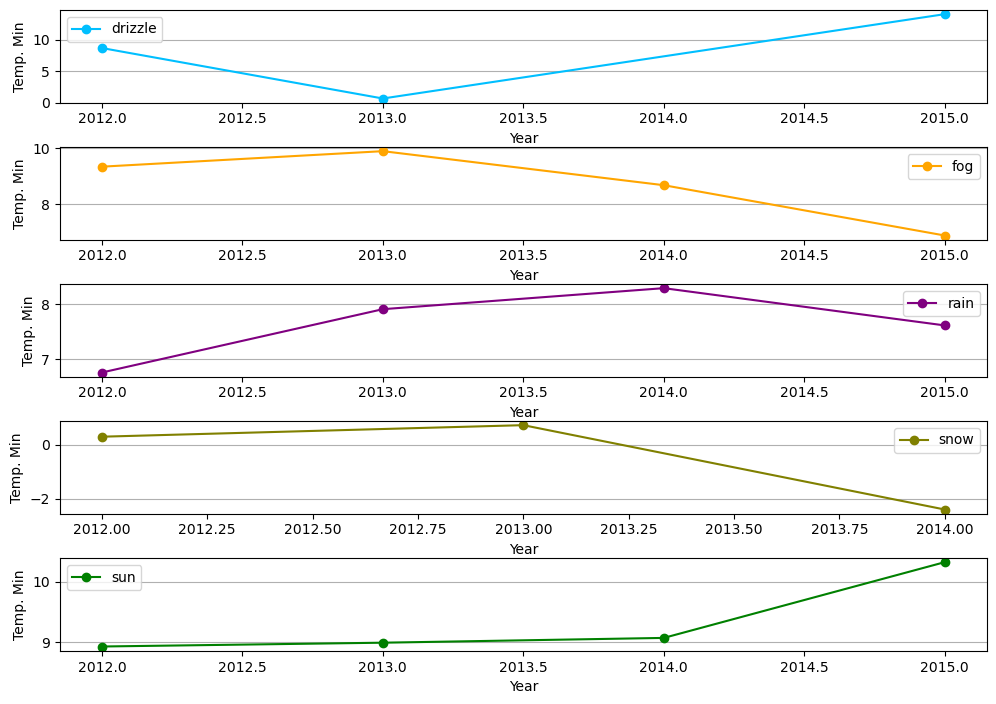

In [22]:
plot_data('Temp. Min', 2, weather_0, weather_1, weather_2, weather_3, weather_4)

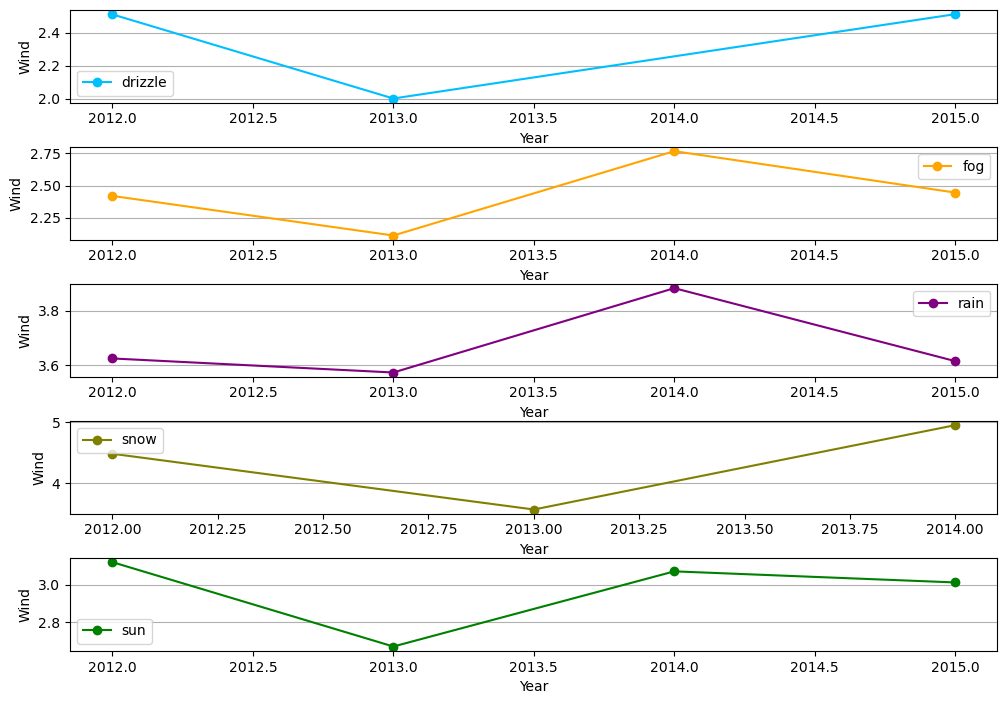

In [23]:
plot_data('Wind', 3, weather_0, weather_1, weather_2, weather_3, weather_4)

## Adding missing values ​​- so that each class has the same number of records (this is to prevent the model from overfitting)

### View into basic data

In [24]:
# Checking the number of occurrences of particular weather 
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [25]:
# Checking how many rows contain the most numerous weather types
df['weather'].value_counts().max()

641

In [26]:
# view of the columns that will be used to train the model
df.columns.drop('date')

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [27]:
# view the types of weather that will be predicted
df['weather'].value_counts().index

Index(['rain', 'sun', 'fog', 'drizzle', 'snow'], dtype='object', name='weather')

In [28]:
# operation checking how many rows contain the weather type 'fog'
len(df[df['weather'] == 'fog'])

101

In [29]:
# checking how many rows there are in total in our data frame
df.index.max()

1460

In [30]:
# checking the average for the weather type 'sun'
df[df['weather'] == 'sun'].mean(numeric_only=True)

precipitation     0.000000
temp_max         19.861875
temp_min          9.343750
wind              2.956406
dtype: float64

In [31]:
# check the last 5 rows in the data frame
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [32]:
# check standard deviation for weather type 'sun'
df[df['weather'] == 'sun'].std(numeric_only=True)

precipitation    0.000000
temp_max         7.698258
temp_min         5.508277
wind             1.164077
dtype: float64

### Function filling missing data - for each class with missing data it creates a new record based on the mean and standard deviation

In [33]:
def append_missing_values():
    max_len = df['weather'].value_counts().max() # 641
    weather = df['weather'].value_counts().index # Index(['rain', 'sun', 'fog', 'drizzle', 'snow'], dtype='object')

    for w in weather:
        # for each type of weather - creation of averages and standard deviation
        mean_percipation, mean_temp_max, mean_temp_min, mean_wind = df[df['weather'] == w].mean(numeric_only=True)
        std_percipation, std_temp_max, std_temp_min, std_wind = df[df['weather'] == w].std(numeric_only=True)
        last_idx = df.index.max() # 1460
        len_idx = len(df[df['weather'] == w])
        # rng - a variable that determines how many additional records should be added to equalize the amount of data
        rng = max_len - len_idx
        
        for i in range(rng):
            # adding a new record - based on the mean and from -2 to 2 * standard deviation
            df.loc[last_idx+i+1] = {'precipitation': mean_percipation + np.random.randint(-2, 3)*std_percipation, 
                                'temp_max': mean_temp_max + np.random.randint(-2, 3)*std_temp_max, 
                                'temp_min': mean_temp_min + np.random.randint(-2, 3)*std_temp_min,
                                'wind': mean_wind + np.random.randint(-2, 3)*std_wind,
                                'weather': w}

In [34]:
# call above function to fill in missing records
append_missing_values()

In [35]:
# displaying number of occurrences of each weather type
df['weather'].value_counts()

weather
drizzle    641
rain       641
sun        641
snow       641
fog        641
Name: count, dtype: int64

In [36]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
3200,NaN,22.596892,11.791387,-4.328211,7.292276,snow
3201,NaN,-5.489200,2.463922,0.146154,7.292276,snow
3202,NaN,22.596892,8.682232,0.146154,2.971170,snow
3203,NaN,8.553846,-0.645234,-4.328211,4.411538,snow
3204,NaN,15.575369,5.573077,4.620518,1.530801,snow


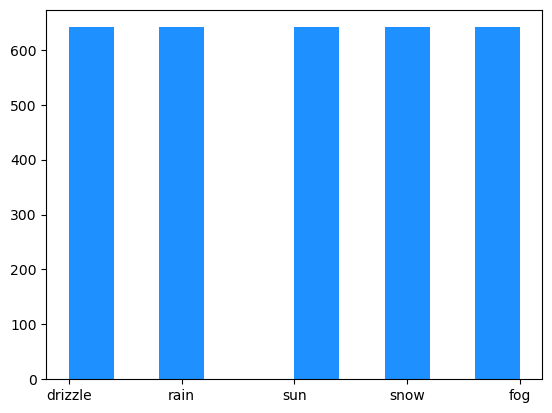

In [37]:
plt.hist(df['weather'], color='dodgerblue')
plt.show()

## Recoding class names to numbers (since machine learning models only work on numbers (not text values))

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['weather'] = le.fit_transform(df['weather'])

In [40]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,12.800000,5.000000,4.700000,0
1,2012-01-02,10.900000,10.600000,2.800000,4.500000,2
2,2012-01-03,0.800000,11.700000,7.200000,2.300000,2
3,2012-01-04,20.300000,12.200000,5.600000,4.700000,2
4,2012-01-05,1.300000,8.900000,2.800000,6.100000,2
...,...,...,...,...,...,...
3200,NaN,22.596892,11.791387,-4.328211,7.292276,3
3201,NaN,-5.489200,2.463922,0.146154,7.292276,3
3202,NaN,22.596892,8.682232,0.146154,2.971170,3
3203,NaN,8.553846,-0.645234,-4.328211,4.411538,3


In [41]:
weather_unique_num = []
for i in idx_lst:
    num = df.loc[i]['weather']
    weather_unique_num.append(num)
weather_unique_num

[0, 1, 2, 3, 4]

In [42]:
# creating a dictionary containing assignments for each type of weather
# (key - weather type in numerical form, value - weather type in text form)
weather_map = {}
for n, l in zip(weather_unique_num, weather_unique_lbs):
    weather_map[n] = l
weather_map

{0: 'drizzle', 1: 'fog', 2: 'rain', 3: 'snow', 4: 'sun'}

In [43]:
# view the first 5 rows in the data frame
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


## Model training

In [44]:
# remove unnecessary column - date
df.drop(columns='date', inplace=True)

df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [45]:
# display the shape of the data frame (number_of_rows, number_of_columns)
df.shape

(3205, 5)

In [46]:
# display the maximum values ​​for each column
df['precipitation'].max(), df['temp_max'].max(), df['temp_min'].max(), df['wind'].max()

(55.9, 35.6, 19.475702625319734, 9.5)

In [47]:
# display the minimum values ​​for each column
df['precipitation'].min(), df['temp_max'].min(), df['temp_min'].min(), df['wind'].min()

(-5.489199757263673, -1.6976572082895824, -7.1, 0.08807920005584124)

In [48]:
# assignments to variables X and y
# X - independent variables used in the learning process
# y - dependent variables (predicted)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

### Scaling of features - due to the potential impact of some features on the model (so that it is not overfitted too quickly and that a given feature does not clearly define the assignment to a specific class)

In [49]:
# import an object for scaling features - which scales features so that they are in the range from -1 to 1
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
X = sc.fit_transform(X)

### Split into training and test set

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [53]:
# displaying the shapes of training and test variables (number_of_rows, number_of_columns)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2564, 4), (641, 4), (2564,), (641,))

In [54]:
# view the first 5 rows in the data frame
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


### Creating a neural network model and training it

In [55]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.callbacks import EarlyStopping 
from keras.optimizers import Adam 
from sklearn.model_selection import KFold 

#### One-way network model with BP algorithm consisting of 4 layers:
1. Input layer consisting of 64 neurons, f. activation: RELU
2. Hidden layer consisting of 32 neurons and f. activation: RELU
3. Hidden layer consisting of 16 neurons and f. activation: RELU
4. An output layer consisting of 5 neurons (because we have 5 types of weather that we try to predict)

In [56]:
# Create model
classifier = Sequential()

# Adding an input layer consisting of 64 neurons, f. activation - RELU
# and an input shape corresponding to X_train.shape[1]
classifier.add(Dense(64, activation = 'relu', input_shape=(X_train.shape[1],)))
# Adding the first hidden layer consisting of 32 neurons and f. activation - RELU
classifier.add(Dense(32, activation = 'relu'))
# Adding a second hidden layer consisting of 16 neurons and f. activation - RELU
classifier.add(Dense(16, activation = 'relu'))
# Adding an output layer consisting of 5 neurons and activation - Softmax
# (because) we have 5 predicted weather conditions
classifier.add(Dense(5, activation = 'softmax'))

# Compilation of the model using the Adam optimizer (with learning rate = 0.001)
# sparse_categorical_crossentropy loss function and accuracy tracking as a metric
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set early stopping condition: accuracy tracking, patience = 1,
# and restoring the best weights. In case the accuracy decreases over 10 epochs -
# - then the best weights are restored
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# Training the model on training data (X_train and y_train)
# training batch size = 32, number of epochs = 100 and use of early stopping
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping])

Epoch 1/100
 1/81 [..............................] - ETA: 12s - loss: 1.6179 - accuracy: 0.2188

2024-06-17 17:07:33.427069: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


81/81 [==============================] - 0s 525us/step - loss: 1.4547 - accuracy: 0.3935
Epoch 2/100
81/81 [==============================] - 0s 450us/step - loss: 1.2064 - accuracy: 0.4852
Epoch 3/100
81/81 [==============================] - 0s 442us/step - loss: 1.0382 - accuracy: 0.5624
Epoch 4/100
81/81 [==============================] - 0s 443us/step - loss: 0.9155 - accuracy: 0.6115
Epoch 5/100
81/81 [==============================] - 0s 451us/step - loss: 0.8296 - accuracy: 0.6416
Epoch 6/100
81/81 [==============================] - 0s 435us/step - loss: 0.7760 - accuracy: 0.6716
Epoch 7/100
81/81 [==============================] - 0s 443us/step - loss: 0.7361 - accuracy: 0.6693
Epoch 8/100
81/81 [==============================] - 0s 443us/step - loss: 0.7082 - accuracy: 0.6946
Epoch 9/100
81/81 [==============================] - 0s 451us/step - loss: 0.6911 - accuracy: 0.7005
Epoch 10/100
81/81 [==============================] - 0s 452us/step - loss: 0.6695 - accuracy: 0.7048
E

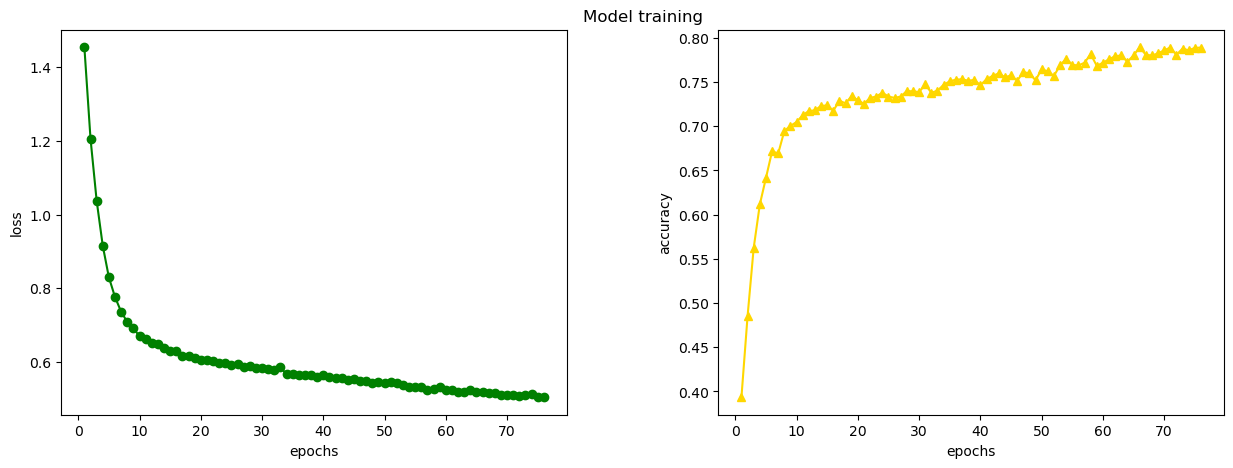

In [57]:
loss = history.history['loss']
acc = history.history['accuracy']
model_epochs = np.arange(1, len(loss) + 1)

plt.figure(figsize=(15, 5))
plt.axis('off')
plt.title('Model training')

plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(model_epochs, loss, marker='o', color='green')

plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(model_epochs, acc, marker='^', color='gold')

plt.subplots_adjust(wspace=0.3)
plt.show()

### Model evaluation - confusion matrix and prediction for random values

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

21/21 [==============================] - 0s 363us/step


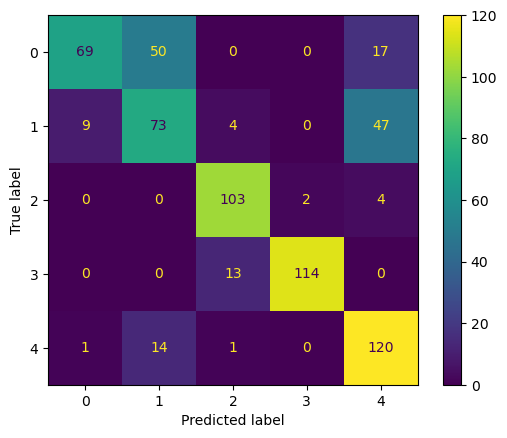

Accuracy: 0.7472698907956318


In [59]:
# Create a confusion matrix and display it
# create a y_pred variable containing predicted data for test data
y_pred = classifier.predict(X_test)
# y_pred - selecting the neuron with the highest prediction probability
y_pred = np.argmax(y_pred, axis=1)
# creating a confusion matrix based on correct data and predicted data
cm = confusion_matrix(y_test, y_pred)
# create an object to display the confusion matrix
disp = ConfusionMatrixDisplay(cm)
# plotting the confusion matrix on the chart
disp.plot()
# display the chart
plt.show()

print('Accuracy:', '\033[93m' + str(accuracy_score(y_test,y_pred)))

In [60]:
# Prediction for randomly selected 5 data points
sample = df.sample(5)
print(sample, end='\n\n')
# iterate through each index of the selected rows
for idx in sample.index:
    # selecting a weather value from a random row
    weather = df.loc[idx]['weather']
    # create a y_pred object containing a prediction of the weather type for a given row
    y_pred = classifier.predict(np.array(df.loc[idx].drop('weather').values).reshape(1, -1), verbose=0)
    # display a comparison of the original weather with the predicted type
    print(f'Original weather: \033[93m{weather_map[weather]}\033[0m,\
           Predicted weather: \033[93m{weather_map[np.argmax(y_pred)]}\033[0m')

      precipitation   temp_max   temp_min      wind  weather
687            26.2  12.800000   9.400000  3.900000        2
1072            9.1  14.400000   8.900000  4.200000        2
1232            0.0  19.400000  10.600000  2.100000        4
2257            0.0   7.114379  -5.253061  0.545089        0
357             6.6   7.200000   3.300000  2.500000        2

Original weather: rain,           Predicted weather: rain
Original weather: rain,           Predicted weather: rain
Original weather: sun,           Predicted weather: drizzle
Original weather: drizzle,           Predicted weather: drizzle
Original weather: rain,           Predicted weather: rain


## Created and trained a model using the cross-validation technique

### Checking whether the same model as above trained using cross-validation will achieve a better result

In [61]:
# lists storing values:
# 1. accuracy (how much of the test data was classified correctly)
# 2. losses (how much the predicted values ​​deviate from the expected values)
cv_accuracy = []
cv_loss = []

# Create a cross-validation object consisting of 5 parts, mixed before splitting with a random state of 42
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# iterate through each part of the cross-validation object
for train_idx, test_idx in kf.split(X):
   # Create variables based on indexes from the currently selected part of the cross-validation object
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Create model
    classifier = Sequential()

    # Adding an input layer consisting of 64 neurons, f. activation - RELU
    # and an input shape corresponding to X_train.shape[1]
    classifier.add(Dense(64, activation = 'relu', input_shape=(X_train.shape[1],)))
    # Adding the first hidden layer consisting of 32 neurons and f. activation - RELU
    classifier.add(Dense(32, activation = 'relu'))
    # Adding a second hidden layer consisting of 16 neurons and f. activation - RELU
    classifier.add(Dense(16, activation = 'relu'))
    # Adding an output layer consisting of 5 neurons and activation - Softmax
    # (because) we have 5 predicted weather conditions
    classifier.add(Dense(5, activation = 'softmax'))

    # Compilation of the model using the Adam optimizer (with learning rate = 0.001)
    # sparse_categorical_crossentropy loss function and accuracy tracking as a metric
    classifier.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Set early stopping condition: accuracy tracking, patience = 1,
    # and restoring the best weights. In case the accuracy decreases over 10 epochs -
    # - then the best weights are restored
    early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

    # Training the model on training data (X_train and y_train)
    # training batch size = 32, number of epochs = 100 and use of early stopping
    classifier.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping])

    # Check the performance of the model by comparing the X_test data with the expected y_test data
    test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
    # Adding precision to the list (a measure of how much of the test data was classified correctly)
    cv_accuracy.append(test_accuracy)
    # Adding a loss to the list (a measure of how much the predicted values ​​deviate from the expected values)
    cv_loss.append(test_loss)

Epoch 1/100
81/81 [==============================] - 0s 469us/step - loss: 1.4434 - accuracy: 0.3374
Epoch 2/100
81/81 [==============================] - 0s 448us/step - loss: 1.1334 - accuracy: 0.5230
Epoch 3/100
81/81 [==============================] - 0s 454us/step - loss: 0.9713 - accuracy: 0.5924
Epoch 4/100
81/81 [==============================] - 0s 453us/step - loss: 0.8772 - accuracy: 0.6279
Epoch 5/100
81/81 [==============================] - 0s 447us/step - loss: 0.8220 - accuracy: 0.6521
Epoch 6/100
81/81 [==============================] - 0s 449us/step - loss: 0.7679 - accuracy: 0.6755
Epoch 7/100
81/81 [==============================] - 0s 448us/step - loss: 0.7221 - accuracy: 0.6970
Epoch 8/100
81/81 [==============================] - 0s 447us/step - loss: 0.6961 - accuracy: 0.7083
Epoch 9/100
81/81 [==============================] - 0s 761us/step - loss: 0.6756 - accuracy: 0.7141
Epoch 10/100
81/81 [==============================] - 0s 453us/step - loss: 0.6561 - accura

### Walidacja modelu - macierz pomyłek oraz predykcja dla losowych wartości

In [62]:
print(f'Loss function - average value: \033[93m{np.mean(cv_loss)}\033[0m')
print(f'Accuracy - average value: \033[93m{np.mean(cv_accuracy)}\033[0m')

Loss function - average value: 0.5281646609306335
Accuracy - average value: 0.7781591176986694


21/21 [==============================] - 0s 330us/step


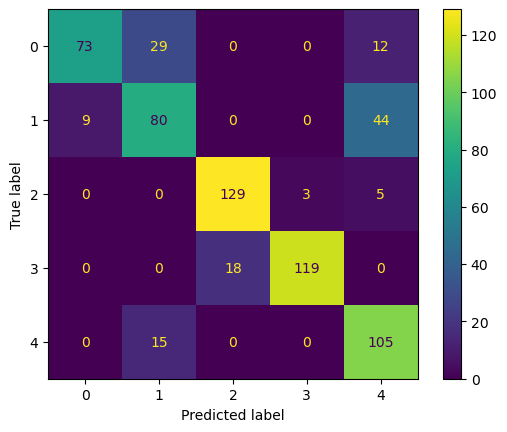

Accuracy - average value: 0.7781591176986694


In [63]:
# Create a confusion matrix and display it
# create a y_pred variable containing predicted data for test data
y_pred = classifier.predict(X_test)
# y_pred - selecting the neuron with the highest prediction probability
y_pred = np.argmax(y_pred, axis=1)
# creating a confusion matrix based on correct data and predicted data
cm = confusion_matrix(y_test, y_pred)
# create an object to display the confusion matrix
disp = ConfusionMatrixDisplay(cm)
# plotting the confusion matrix on the chart
disp.plot()
# display the chart
plt.show()

print(f'Accuracy - average value: \033[93m{np.mean(cv_accuracy)}\033[0m')

In [64]:
# Prediction for randomly selected 5 data points
sample = df.sample(5)
print(sample, end='\n\n')
# iterate through each index of the selected rows
for idx in sample.index:
    # selecting a weather value from a random row
    weather = df.loc[idx]['weather']
    # create a y_pred object containing a prediction of the weather type for a given row
    y_pred = classifier.predict(np.array(df.loc[idx].drop('weather').values).reshape(1, -1))
    # display a comparison of the original weather with the predicted type
    print(f'Original weather: \033[93m{weather_map[weather]}\033[0m,\
           Predicted weather: \033[93m{weather_map[np.argmax(y_pred)]}\033[0m')
        

      precipitation   temp_max   temp_min      wind  weather
2569            0.0  15.926415   0.929130  3.279342        0
1902            0.0  23.532149   7.979208  0.088079        1
724             0.0   6.700000   1.700000  0.800000        4
2041            0.0  -1.697657  13.293512  1.456507        0
1079            0.0  12.200000   6.700000  5.900000        4

1/1 [==============================] - 0s 12ms/step
Original weather: drizzle,           Predicted weather: drizzle
1/1 [==============================] - 0s 11ms/step
Original weather: fog,           Predicted weather: drizzle
1/1 [==============================] - 0s 10ms/step
Original weather: sun,           Predicted weather: drizzle
1/1 [==============================] - 0s 10ms/step
Original weather: drizzle,           Predicted weather: drizzle
1/1 [==============================] - 0s 11ms/step
Original weather: sun,           Predicted weather: fog


## Save the model

In [65]:
# selecting a random row from the data frame
sample = df.sample()
# creating variables test_data - independent variables and test_res - dependent variable
test_data, test_res = sample[['precipitation', 'temp_max', 'temp_min', 'wind']], sample['weather']
sample

,precipitation,temp_max,temp_min,wind,weather
25,4.8,8.9,1.1,4.8,2


In [66]:
# save the model as weather_model.h5
classifier.save('weather_model.h5')

### Loading the model - checking if everything works correctly

In [67]:
from keras.models import load_model

In [68]:
# load the model into the load_model variable
load_model = load_model('weather_model.h5')

In [69]:
# creating a before variable containing predicted neuron values ​​for independent variables
# (this is an array with the probability of occurrence of a given neuron)
pred = load_model.predict(test_data)
# assigning the neuron that has the highest probability of occurrence to the pred variable
pred = np.argmax(pred, axis=1)
# display the value
print("Original:", test_res.values, '-', weather_map[int(test_res)])
print("Predicted:", pred, '-', weather_map[int(pred)])

1/1 [==============================] - 0s 28ms/step
Original: [2] - rain
Predicted: [2] - rain


/var/folders/2z/jzph_r3563xcyq9w7yqt55400000gn/T/ipykernel_43141/860952587.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Original:", test_res.values, '-', weather_map[int(test_res)])
